In [294]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [295]:
#Dataset and other docs here: https://drive.google.com/drive/folders/1-S7eu5K1By2bmOLMoB7elgHCBq3qgcEW?usp=share_link

In [296]:
Dataset = 'bengaluru.csv'

In [297]:
data = pd.read_csv(Dataset)

In [298]:
data.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph', 'FeelsLikeC'],
      dtype='object')

In [299]:
'''
['sunHour', 'uvIndex', 'humidity',
       'precipMM', 'visibility','pressure','FeelsLikeC']
'''

"\n['sunHour', 'uvIndex', 'humidity',\n       'precipMM', 'visibility','pressure','FeelsLikeC']\n"

In [300]:
data[data.isnull().any(axis=1)]

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,FeelsLikeC


In [301]:
data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,FeelsLikeC
0,27,12,0,11.6,5,1,18,18,2,91,0.0,1014,14,10,109,8,18
1,27,12,0,11.6,5,1,17,17,2,93,0.0,1014,14,7,85,6,17
2,27,12,0,11.6,5,1,16,16,2,94,0.0,1014,13,5,61,4,16
3,27,12,0,11.6,5,1,15,15,2,96,0.0,1014,12,2,37,3,15
4,27,12,0,11.6,5,1,18,18,1,88,0.0,1015,14,5,45,3,18


In [302]:
before_rows = data.shape[0]
print(before_rows)
data = data.dropna()
after_rows = data.shape[0]
print(after_rows)

96432
96432


In [303]:
data.shape

(96432, 17)

In [304]:
cols_to_use = ['sunHour', 'uvIndex', 'humidity','precipMM', 'visibility','pressure','FeelsLikeC']

In [305]:
X = data[cols_to_use[:-1]]

In [306]:
y = data[cols_to_use[-1]]

In [307]:
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (96432, 6)
Shape of y =  (96432,)


In [308]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [309]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
reg = DecisionTreeRegressor(max_depth=4)

In [310]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [311]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_2 <= 70.50
|   |--- feature_5 <= 1011.50
|   |   |--- feature_2 <= 52.50
|   |   |   |--- feature_5 <= 1009.50
|   |   |   |   |--- value: [31.48]
|   |   |   |--- feature_5 >  1009.50
|   |   |   |   |--- value: [28.80]
|   |   |--- feature_2 >  52.50
|   |   |   |--- feature_2 <= 61.50
|   |   |   |   |--- value: [28.33]
|   |   |   |--- feature_2 >  61.50
|   |   |   |   |--- value: [26.95]
|   |--- feature_5 >  1011.50
|   |   |--- feature_2 <= 47.50
|   |   |   |--- feature_1 <= 6.50
|   |   |   |   |--- value: [26.00]
|   |   |   |--- feature_1 >  6.50
|   |   |   |   |--- value: [28.21]
|   |   |--- feature_2 >  47.50
|   |   |   |--- feature_5 <= 1013.50
|   |   |   |   |--- value: [24.89]
|   |   |   |--- feature_5 >  1013.50
|   |   |   |   |--- value: [22.61]
|--- feature_2 >  70.50
|   |--- feature_2 <= 84.50
|   |   |--- feature_5 <= 1012.50
|   |   |   |--- feature_2 <= 78.50
|   |   |   |   |--- value: [25.31]
|   |   |   |--- feature_2 >  78.50
|   |   |   

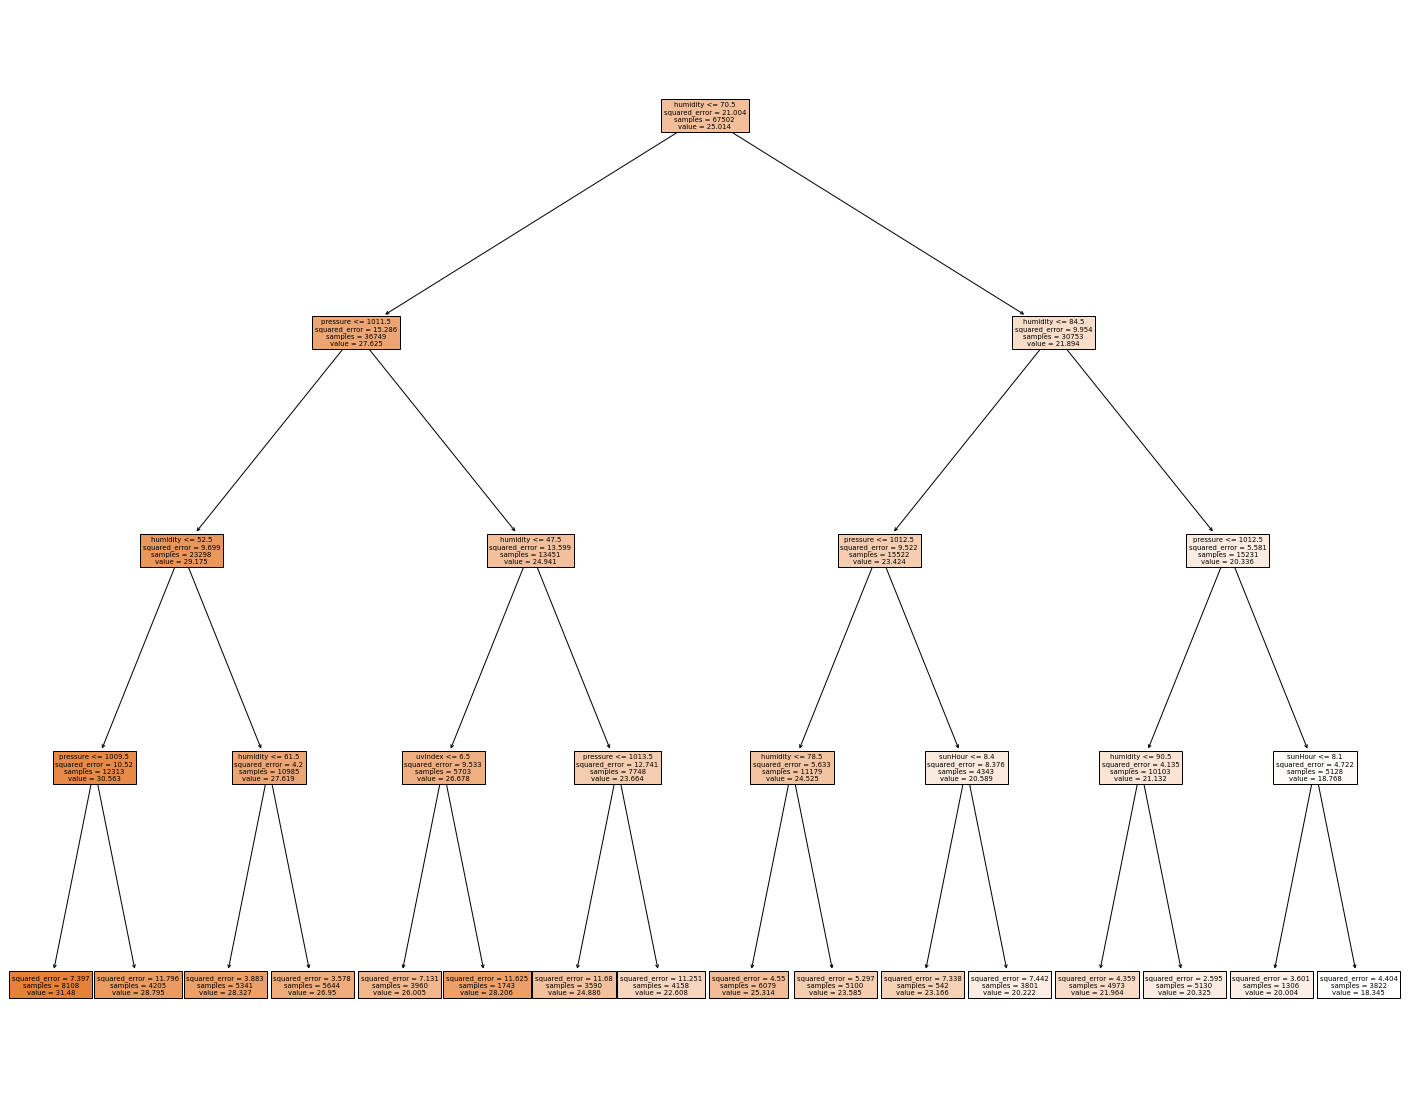

In [312]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=cols_to_use[:-1], filled=True)

In [313]:
y_pred = reg.predict(X_test)

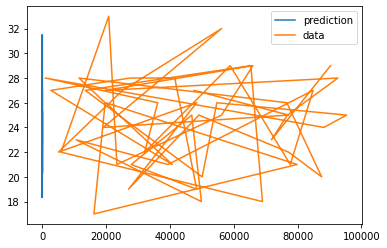

In [314]:
plt.plot(y_pred[:50], label = 'prediction')
plt.plot(y_test[:50], label = 'data')
plt.legend()
plt.show()

In [315]:
for i in range(20):
  print(list(y_test)[i],round(list(y_pred)[i],1))

29 28.3
23 24.9
25 22.0
28 27.0
27 28.8
29 28.3
25 22.0
21 22.0
33 31.5
22 22.0
18 18.3
29 28.3
27 23.6
20 20.3
26 28.8
25 20.2
24 23.2
28 28.8
26 25.3
22 22.0


In [316]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, reg.predict(X_test))

1.9165187996131685

In [317]:
# save the model to disk
import pickle
filename = 'finalized_model_'+str(Dataset[:-4])+'.sav'
print(filename)
pickle.dump(reg, open(filename, 'wb'))

finalized_model_bengaluru.sav


In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)